## HEART DISEASE PREDICTION USING ARTIFICIAL NEURAL NETWORKS(ANN) MODEL

# ***Dataset Summary***

The dataset is about the details of the patients, using these details we have to predict the whether the patient is having heart disease or not using artificial neural network(ANN) algorithm.

It consists of the features like Age,sex,Chest pain type, BP, Cholesterol, FBS over 120	 and etc.,

This datset is downloaded in kaggle in https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction

In [2]:
# Unzip the folder
!unzip'/content/drive/MyDrive/Artificial neural network- Heart disease prediction/archive.zip'

/bin/bash: line 1: unzip/content/drive/MyDrive/Artificial neural network- Heart disease prediction/archive.zip: No such file or directory


# IMPORTING LIBRARIES

In [3]:
# importing necessary libraries

!pip install tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Loading the dataset
df= pd.read_csv('/content/drive/MyDrive/Artificial neural network- Heart disease prediction/archive.zip')
df.head()   #Let see the top 5 rows

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## DATA EXPLORATION

In [5]:
# Look at the shape of dataset
df.shape

(270, 14)

There are 270 rows and 14 columns.

In [6]:
# Checking the data and its datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

From the information above, we can see all the features are numerical and there are no null values present in the dataset.

In [7]:
#Checking the statistical inference of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


From the statistical inference, we can find the datset seems clean and some outliers are present in Cholestrol and ST depression columns and that too less in numbers which we can handle in the upcoming preprocessing step.

In [8]:
# Checking the null values present in the dataset

df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

It seems there are no null values as we saw those already.

In [9]:
# Check any duplicate rows present in the dataset.
duplicate_rows= df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium, Heart Disease]
Index: []


There are no duplicate values present in the dataset.

In [10]:
# Let see some unique values to see any missing values or inappropriate values to handle.
df['Thallium'].unique()

array([3, 7, 6])

All the features having the appropriate values. There are no further preprocessing steps  requierd.

## EXPLORATORY DATA ANALYSIS(EDA)

 DATA VISUALIZATION

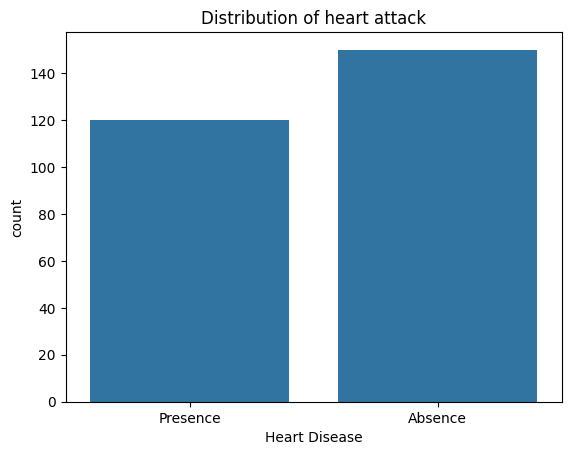

In [11]:
# Let see the distribution of target values for each category using countplot

sns.countplot(x='Heart Disease', data=df)
plt.title("Distribution of heart attack")
plt.show()

From the plot, out of 270 records, the heart disease present in 120 patients and absence in 150 patients. From this we can say that the data is not evenly distributed and at the same time it's not biased as well.

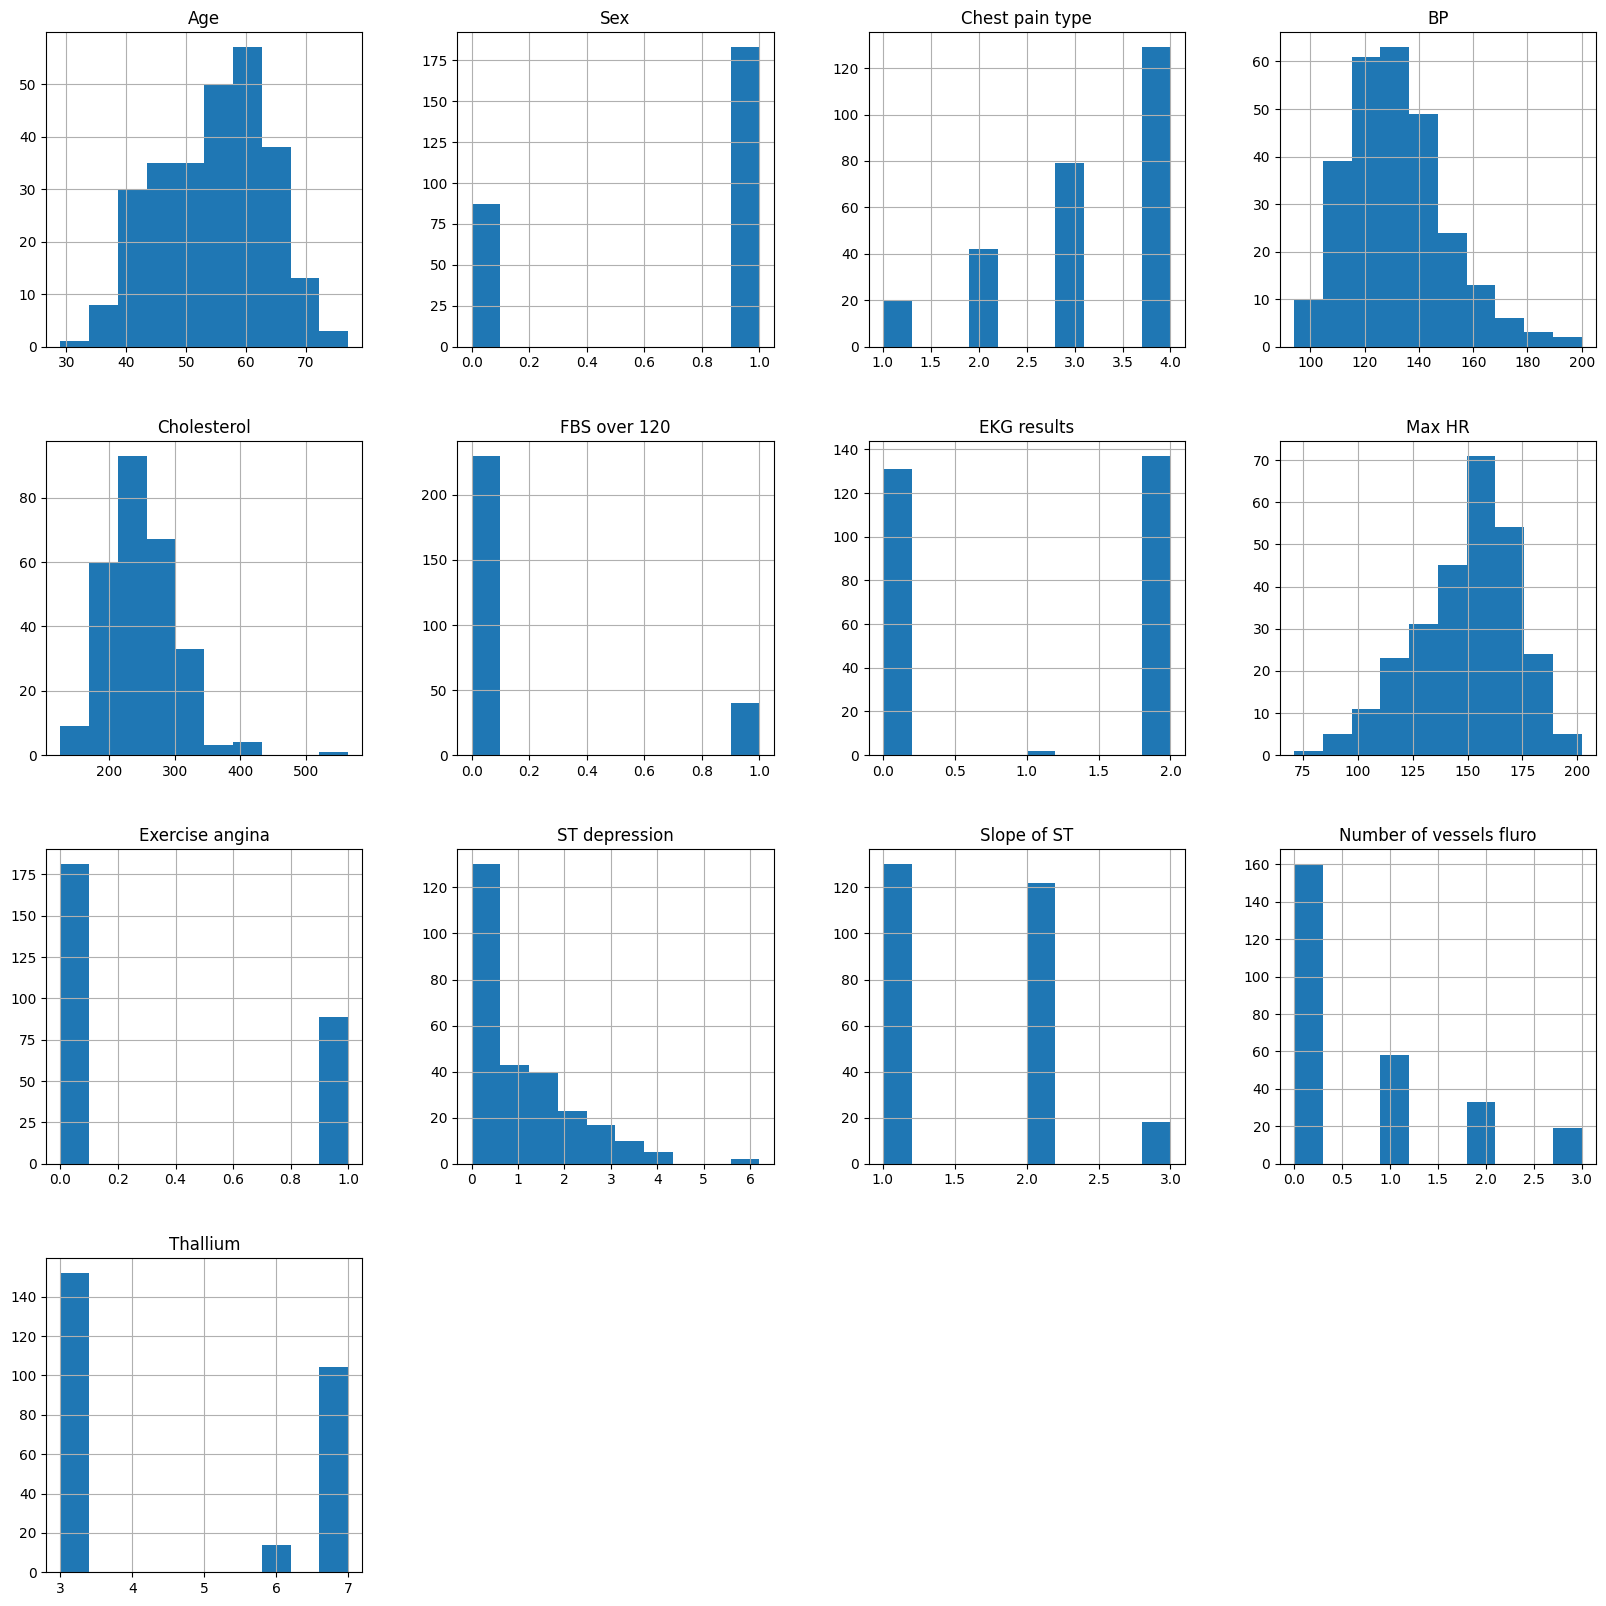

In [12]:
# Checking the distribution of each features using histograms
df_hist = df.hist(figsize=(20,20))

From the histograms, we can alse able to see some outliers in present in Cholesterol and ST depression columns that need to be handled.

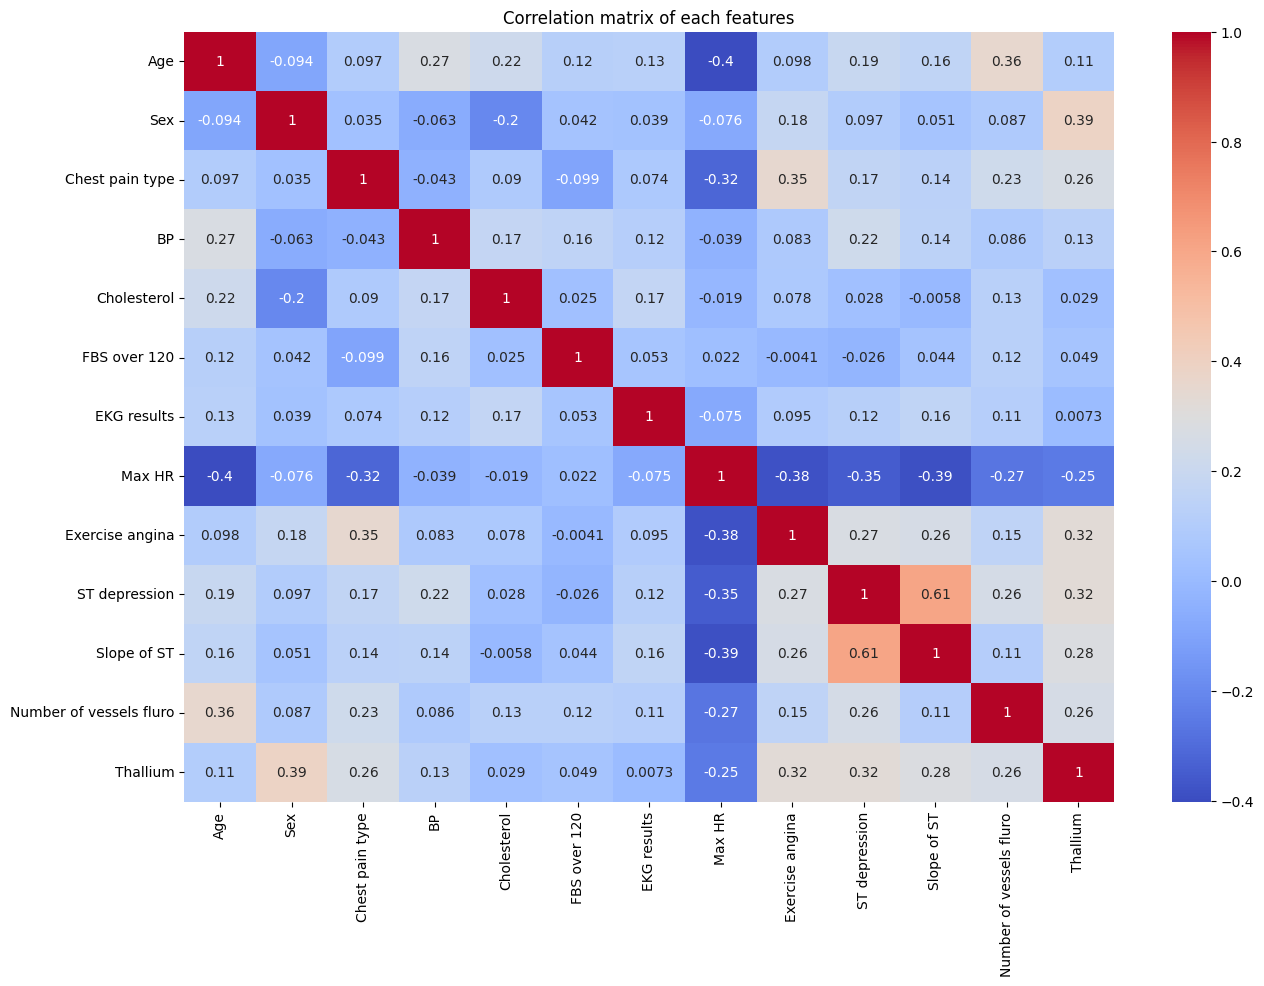

In [13]:
# Lets check the relationship between the features using heatmap.
plt.figure(figsize=(15,10))
df_corr= df.drop("Heart Disease", axis='columns')
sns.heatmap(df_corr.corr(), annot= True, cmap='coolwarm')
plt.title("Correlation matrix of each features")
plt.show()

From the heatmap, we can see there are no close correlation between the features except 'ST depression' and 'Slope of ST' columns. It is no way helpful for our further analysis.

## DATA PREPROCESSING

 Finding outliers

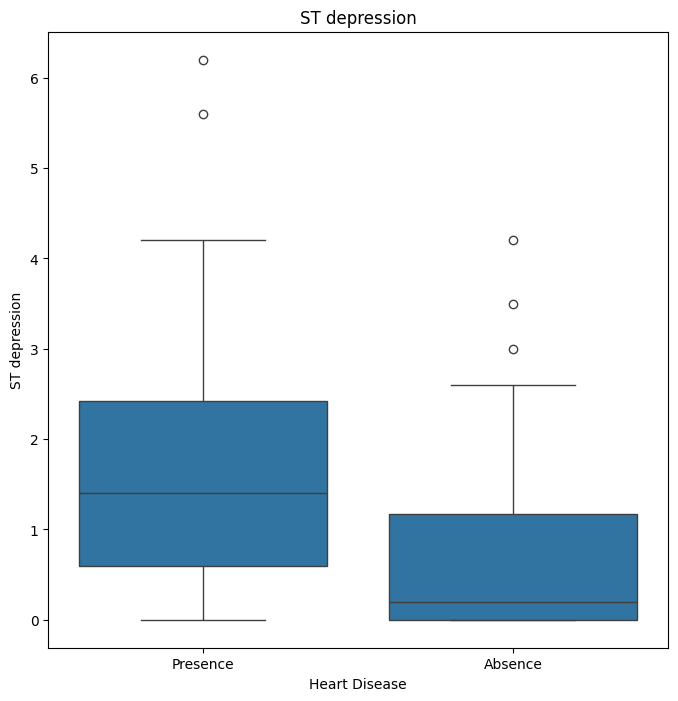

In [14]:
# Find outliers using box plot for ST depression.
plt.figure(figsize=(8,8))
sns.boxplot(data= df, x='Heart Disease', y='ST depression')
plt.title('ST depression')
plt.show()

There are few outliers present in both absence and presence categories.

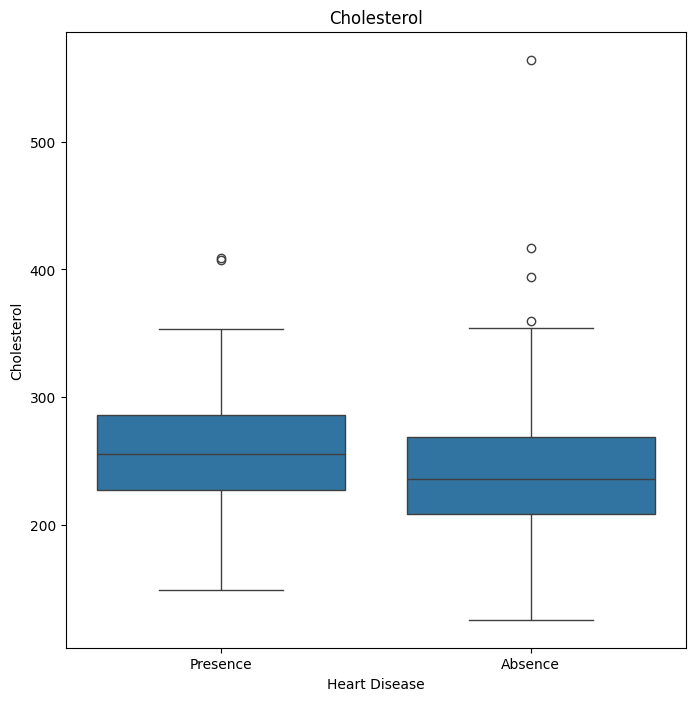

In [15]:
# Find outliers using box plot for Cholesterol.
plt.figure(figsize=(8,8))
sns.boxplot(data= df, x='Heart Disease', y='Cholesterol')
plt.title('Cholesterol')
plt.show()

Here also we can see some outliers in both categoris. That needs to be handled.

** Handling Outliers**

In [16]:
# Define a new function to drop the outliers using IQR method by giving some threshold to detect outside the given range.
def drop_outliers_IQR(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3 - q1
  not_outliers =df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
  outliers_dropped = not_outliers.dropna().reset_index(drop=True)
  return outliers_dropped

In [17]:
# Checking the two coloumns after dropping the outliers
cleaned_df = drop_outliers_IQR(df[['ST depression', 'Cholesterol']])
cleaned_df

,ST depression,Cholesterol
0,2.4,322.0
1,0.3,261.0
2,0.2,263.0
3,0.2,269.0
4,0.4,177.0
...,...,...
256,0.5,199.0
257,0.0,263.0
258,1.3,294.0
259,0.4,192.0


Out of 270 rows, we removed 9 outliers in ST depression and Cholesterol column.

In [18]:
# Let join our cleaned_df and original dataframe using concat function. And remove ST depression and Cholesterol in original dataframe to avoid duplicate columns.
merged_df = pd.concat([df.drop(columns=['ST depression','Cholesterol']), cleaned_df], axis=1)
merged_df


,Age,Sex,Chest pain type,BP,FBS over 120,EKG results,Max HR,Exercise angina,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,ST depression,Cholesterol
0,70,1,4,130,0,2,109,0,2,3,3,Presence,2.4,322.0
1,67,0,3,115,0,2,160,0,2,0,7,Absence,0.3,261.0
2,57,1,2,124,0,0,141,0,1,0,7,Presence,0.2,263.0
3,64,1,4,128,0,0,105,1,2,1,7,Absence,0.2,269.0
4,74,0,2,120,0,2,121,1,1,1,3,Absence,0.4,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,1,0,162,0,1,0,7,Absence,NaN,NaN
266,44,1,2,120,0,0,173,0,1,0,7,Absence,NaN,NaN
267,56,0,2,140,0,2,153,0,2,0,3,Absence,NaN,NaN
268,57,1,4,140,0,0,148,0,2,0,6,Absence,NaN,NaN


Now we have 270 rows and 14 columns with no outliers. But with NaN values thats need to be handled.

In [19]:
# Drop the rows which has NaN values
merged_df.dropna(inplace=True)
merged_df.shape

(261, 14)

Now we have the clean dataset. It is good to go for further analysis.

In [20]:
# Checking once again for any null values.
merged_df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
ST depression              0
Cholesterol                0
dtype: int64

There are no null values present in the dataset after handling outliers.

# LABEL ENCODING

In [21]:
# Our target column having object datatype. That need to be converted to numeric using label encoder.
Label_encoder= LabelEncoder()
merged_df['Heart Disease']= Label_encoder.fit_transform(merged_df['Heart Disease'])
merged_df['Heart Disease'].unique()

array([1, 0])

# DEFINE INPUT(X) AND OUTPUT(Y)

In [22]:
# Here our target(output) is "Heart disease" column and rest all the features are our input.
X = merged_df.drop(columns=['Heart Disease']).values
Y= merged_df.iloc[:,-3].values

In [23]:
# Checking X and Y as a dataframe
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,70.0,1.0,4.0,130.0,0.0,2.0,109.0,0.0,2.0,3.0,3.0,2.4,322.0
1,67.0,0.0,3.0,115.0,0.0,2.0,160.0,0.0,2.0,0.0,7.0,0.3,261.0
2,57.0,1.0,2.0,124.0,0.0,0.0,141.0,0.0,1.0,0.0,7.0,0.2,263.0
3,64.0,1.0,4.0,128.0,0.0,0.0,105.0,1.0,2.0,1.0,7.0,0.2,269.0
4,74.0,0.0,2.0,120.0,0.0,2.0,121.0,1.0,1.0,1.0,3.0,0.4,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,61.0,1.0,3.0,150.0,1.0,0.0,137.0,1.0,2.0,0.0,3.0,0.5,199.0
257,55.0,1.0,4.0,132.0,0.0,0.0,132.0,1.0,2.0,1.0,7.0,0.0,263.0
258,64.0,1.0,3.0,140.0,0.0,0.0,158.0,0.0,1.0,0.0,3.0,1.3,294.0
259,43.0,1.0,4.0,150.0,0.0,0.0,171.0,0.0,1.0,0.0,3.0,0.4,192.0


In [24]:
pd.DataFrame(Y)

,0
0,1
1,0
2,1
3,0
4,0
...,...
256,0
257,1
258,1
259,0


In [25]:
# Checking the shape of X and Y after defining
X.shape, Y.shape

((261, 13), (261,))

# STANDARDIZATION OF DATASET

In [26]:
# Apply standard scaler to scale our features
Scaler= StandardScaler()
Scaler.fit_transform(X)

array([[ 1.6989248 ,  0.70101967,  0.85820817, ..., -0.86864129,
         1.39244143,  1.71962031],
       [ 1.37159751, -1.42649351, -0.19835943, ...,  1.19710246,
        -0.6558601 ,  0.33507116],
       [ 0.28050653,  0.70101967, -1.25492703, ...,  1.19710246,
        -0.75339826,  0.38046621],
       ...,
       [ 1.04427021,  0.70101967, -0.19835943, ..., -0.86864129,
         0.31952159,  1.08408955],
       [-1.24702084,  0.70101967,  0.85820817, ..., -0.86864129,
        -0.55832193, -1.23105821],
       [ 0.38961563, -1.42649351, -0.19835943, ..., -0.86864129,
         0.51459792,  0.90250933]])

Now our input features are standardized

# SPLITTING THE DATASET FOR TRAIING AND TESTING

In [27]:
# Split out dataset for train and testing using sklearn library with 80% for training and 20% for testing.
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state=45)

In [28]:
# Checking the shape of X and Y after train_test_split
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((208, 13), (53, 13), (208,), (53,))

## BUILDING ARTIFICIAL NEURAL NETWORKS(ANN)

In [29]:
# Initialize ANN

ann = tf.keras.models.Sequential()
ann

# Adding Input, hidden and hidden layers

In [30]:
# Adding hidden layer 1 with 15 neurons and relu activation function

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [31]:
# Adding hidden layer 2 with 15 neurons and relu activation function

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [32]:
# Adding hidden layer 3 with 15 neurons and relu activation function

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [58]:
# Adding hidden layer 4 with 15 neurons and relu activation function

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [59]:
# Adding hidden layer 5 with 15 neurons and relu activation function

ann.add(tf.keras.layers.Dense(units=15, activation='relu'))

In [60]:
# Adding output layer with 1 neuron

ann.add(tf.keras.layers.Dense(units=1))

#Compiling the ANN

In [61]:
# Compiling and optimizing our model with adam and checking the loss using mean squared error

ann.compile(optimizer='adam', loss= 'mean_squared_error', metrics=['MeanSquaredLogarithmicError'])

# Training the ANN

In [62]:
# Train our ANN model with training data and the batch size of 30 and run 100 epochs to check and evaluate using the loss function and mean squared error
model= ann.fit(X_train, Y_train, batch_size= 30, epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 5ms/step - loss: 0.4535 - mean_squared_logarithmic_error: 0.2073
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3904 - mean_squared_logarithmic_error: 0.1788
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.3429 - mean_squared_logarithmic_error: 0.1521
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3032 - mean_squared_logarithmic_error: 0.1337
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2651 - mean_squared_logarithmic_error: 0.1203
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2515 - mean_squared_logarithmic_error: 0.1228
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2500 - mean_squared_logarithmic_error: 0.1272
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2491 - mean_squared_logarithmic_error: 0.1260
Epoch 9/100
7/7 [==============================]

# Predicting the result

In [63]:
# Predicting the result using testing data
Y_pred= ann.predict(X_test)
Y_pred

2/2 [==============================] - 0s 8ms/step


array([[0.7716104 ],
       [0.7980604 ],
       [0.20927572],
       [0.06460837],
       [0.17976272],
       [0.11571958],
       [1.0393057 ],
       [0.92636764],
       [0.06248046],
       [0.10281894],
       [0.08171117],
       [0.97926503],
       [0.2234396 ],
       [0.07505514],
       [0.22161224],
       [0.01509567],
       [0.23388484],
       [0.09462013],
       [0.09565811],
       [0.24059516],
       [0.41390175],
       [0.26682994],
       [0.05967451],
       [0.10798681],
       [0.00822323],
       [0.24567986],
       [0.07067461],
       [1.0650808 ],
       [0.7637642 ],
       [0.82541186],
       [0.08933545],
       [0.07575911],
       [0.826604  ],
       [0.913461  ],
       [0.19366956],
       [0.47187847],
       [0.09609514],
       [0.09125364],
       [0.8433586 ],
       [0.965549  ],
       [0.9648463 ],
       [0.7127386 ],
       [0.02775643],
       [0.07522427],
       [0.9707269 ],
       [0.6142278 ],
       [0.54399097],
       [0.104

In [64]:
lst_1 = []
for i in Y_pred:
  if i>0.5:
    lst_1.append(1)
  else:
    lst_1.append(0)

In [65]:
print(lst_1)

[1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]


In [66]:
# Checking the accuracy of our model using r2 score.
accuracy_score(Y_test, lst_1)

0.8301886792452831

Our model predicts 83% of accuracy.

In [68]:
print(classification_report(Y_test, lst_1))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.89      0.71      0.79        24

    accuracy                           0.83        53
   macro avg       0.84      0.82      0.82        53
weighted avg       0.84      0.83      0.83        53



# Accuracy and Classfication report Summary

Based on the classification report above,we can summarizes the performance of the model:

Precision: The model achieved a precision of 0.79 for class 0, indicating all predictions for this class were correct, and 0.89 for class 1.

Recall: Recall was 0.93 for class 0, meaning 93% of actual instances of class 0 were correctly classified, and 0.71 for class 1, indicating all instances of class 1 were correctly classified.

F1-score: The F1-score, which balances precision and recall, was 0.86 for class 0 and 0.79 for class 1, demonstrating balanced performance across both classes.

Support: Class 0 had 29 instances and Class 1 had 24 instances  in the dataset, ensuring an almost equal representation for evaluation.

Overall Accuracy: The model achieved an accuracy of 83% across all predictions.